In [ ]:
pip install ucimlrepo

/tmp/ipython-input-38-53686237.py:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({column_name: dict_name}, inplace=True)
/tmp/ipython-input-38-53686237.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({column_name: dict_name}, inplace=True)


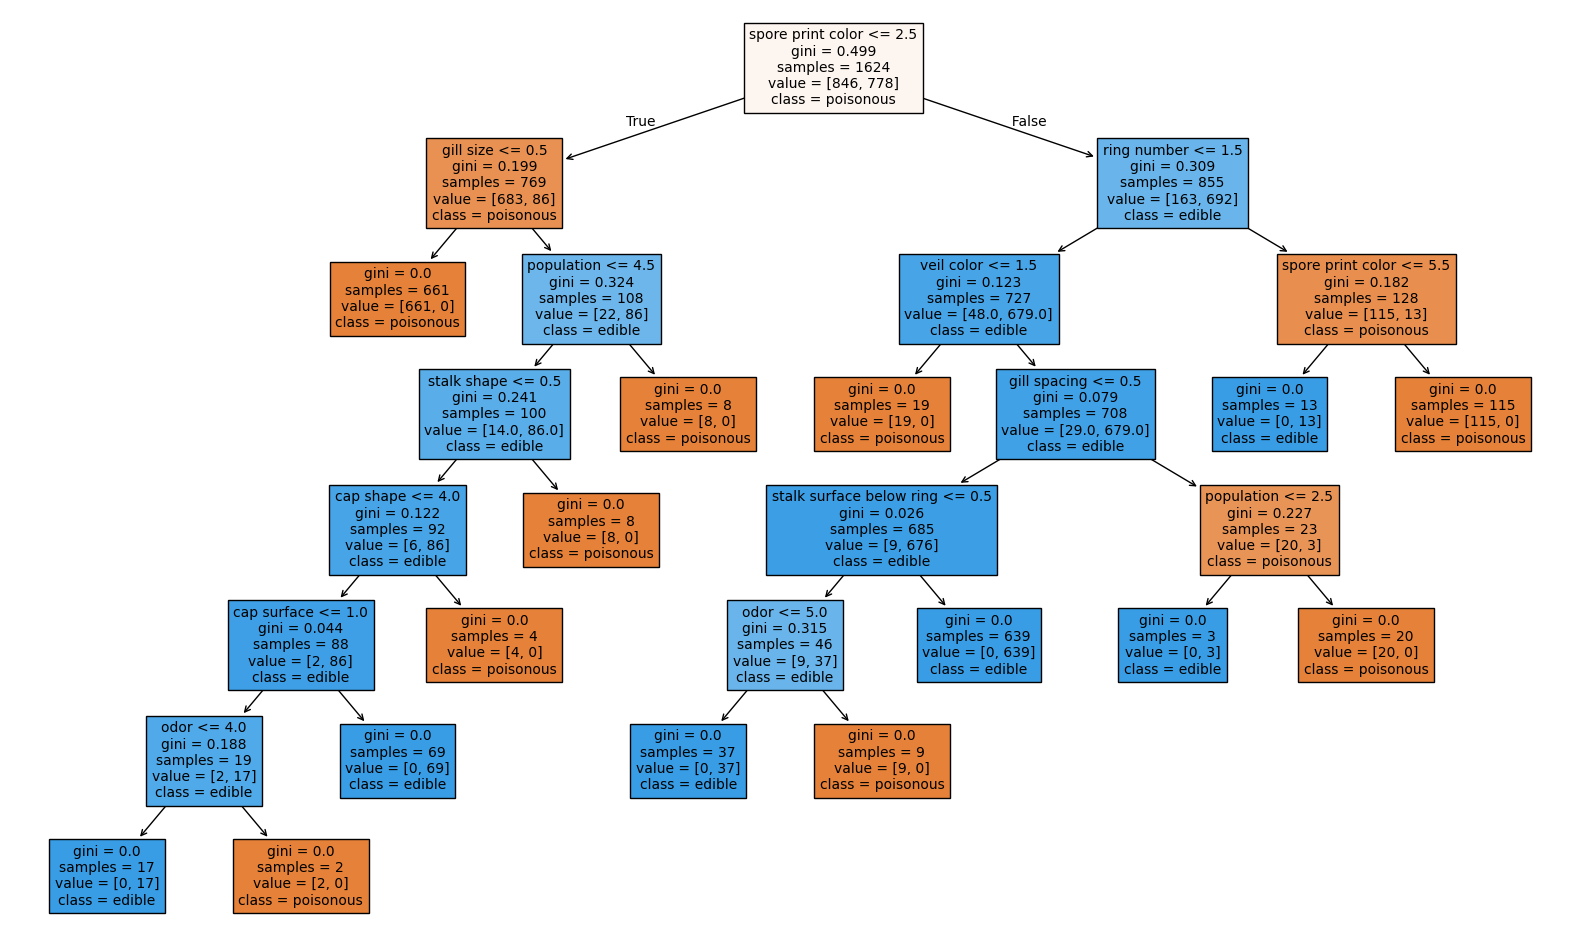

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split                     # sklearn == scikit-learn
from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt


# from import instructions here: https://archive.ics.uci.edu/dataset/73/mushroom
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# set model
model = tree.DecisionTreeClassifier()

# change strings to numbers for classification
edibility = {"p": 0, "e": 1}
cap_shape = {"b": 0, "c": 1, "x": 2, "f": 3, "k": 4, "s": 5}
cap_surface = {"f": 0, "g": 1, "y": 2, "s": 3}
cap_color = {"n": 0, "b": 1, "c": 2, "g": 3, "r": 4, "p": 5, "u": 6, "e": 7, "w": 8, "y": 9}
bruises = {"t": 0, "f": 1}
odor = {"a": 0, "l": 1, "c": 2, "y": 3, "f": 4, "m": 5, "n": 6, "p": 7, "s": 8}
gill_attachment = {"a": 0, "d": 1, "f": 2, "n": 3}
gill_spacing = {"c": 0, "w": 1, "d": 2}
gill_size = {"b": 0, "n": 1}
gill_color = {"k": 0, "n": 1, "b": 2, "h": 3, "g": 4, "r": 5, "o": 6, "p": 7, "u": 8, "e": 9, "w": 10, "y": 11}
stalk_shape = {"e": 0, "t": 1}
stalk_root = {"b": 0, "c": 1, "u": 2, "e": 3, "z": 4, "r": 5}
stalk_surface_above_ring = {"f": 0, "y": 1, "k": 2, "s": 3}
stalk_surface_below_ring = {"f": 0, "y": 1, "k": 2, "s": 3}
stalk_color_above_ring = {"n": 0, "b": 1, "c": 2, "g": 3, "o": 4, "p": 5, "e": 6, "w": 7, "y": 8}
stalk_color_below_ring = {"n": 0, "b": 1, "c": 2, "g": 3, "o": 4, "p": 5, "e": 6, "w": 7, "y": 8}
veil_type = {"p": 0, "u": 1}
veil_color = {"n": 0, "o": 1, "w": 2, "y": 3}
ring_number = {"n": 0, "o": 1, "t": 2}
ring_type = {"c": 0, "e": 1, "f": 2, "l": 3, "n": 4, "p": 5, "s": 6, "z": 7}
spore_print_color = {"k": 0, "n": 1, "b": 2, "h": 3, "r": 4, "o": 5, "u": 6, "w": 7, "y": 8}
population = {"a": 0, "c": 1, "n": 2, "s": 3, "v": 4, "y": 5}
habitat = {"g": 0, "l": 1, "m": 2, "p": 3, "u": 4, "w": 5, "d": 6}


column_names = [
    cap_shape, cap_surface,
    cap_color, bruises, odor,
    gill_attachment, gill_spacing, gill_size,
    gill_color, stalk_shape, stalk_root,
    stalk_surface_above_ring, stalk_surface_below_ring, stalk_color_above_ring,
    stalk_color_below_ring, veil_type, veil_color,
    ring_number, ring_type, spore_print_color,
    population, habitat
]

for column_name, dict_name in zip(X, column_names):
    X.replace({column_name: dict_name}, inplace=True)

# for decision tree visualization
variables = [
    "cap shape", "cap surface",
    "cap color", "bruises", "odor",
    "gill_ attachment", "gill spacing", "gill size",
    "gill color", "stalk shape", "stalk root",
    "stalk surface above ring", "stalk surface below ring", "stalk color above ring",
    "stalk color below ring", "veil type", "veil color",
    "ring number", "ring type", "spore print color",
    "population", "habitat"
]

#************************** TRAINING **************************************

# split the data into train and test sets
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# fit training data to model
# source for all model parameters: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
fitted_model = model.fit(X_train, y_train)

# visualization of decision tree
# source: https://stackoverflow.com/questions/25274673/is-it-possible-to-print-the-decision-tree-in-scikit-learn
# source: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
plt.figure(figsize=(20,12))
tree.plot_tree(fitted_model, filled=True, feature_names=variables, class_names = ["poisonous", "edible"], fontsize=10)
plt.show()

#************************** PREDICTION **************************************
# predict
y_pred = model.predict(X_test)
